#### Projet ML Diagnosis of COVID-19 and it's clinical spectrum

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [62]:
data=pd.read_excel('dataset.xlsx')

In [63]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

### Exploratory Data Analysis

##### Analyse de forme
-  Variable Target:  SARS-Cov-2 exam result
-  Lignes et colonnes: (5644, 111)
-  Types de variable: float64  (70), object (37), int64(4)
-  Analyse des valeurs manquantes:
   - moitié des variables ont plus de 90% de nan
   - 2 groupes de données 76% > test  viral, 89% > taux sanguin

### Analyse de fond 
- Visualisation de la target: negative    0.901134, positive    0.098866
- Signification des variables:
    - variables continues standarsisés ,skewed(asymétriques),test sanguin
    - age quantile: difficile d'interpreter données traités
    - Variables qualitatives : binaire(0,1),viral, Rhinovirus qui semble tres élevée
- Relation Variables / Target:tester hypothéses ; monocytes; leucocytes; Platelet
       - target / Viral les doubles malaidies sont tres rares rhinovirus/ enterovirus possitif covid 19 negatif? hypothese a tester. on pourrait avoir deux virus en même temps 

#### 1 - Analyse de la forme des données

#####  - A Visualisation initiale

In [64]:
df=data.copy()

In [65]:
df.shape

(5644, 111)

In [66]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

<Axes: >

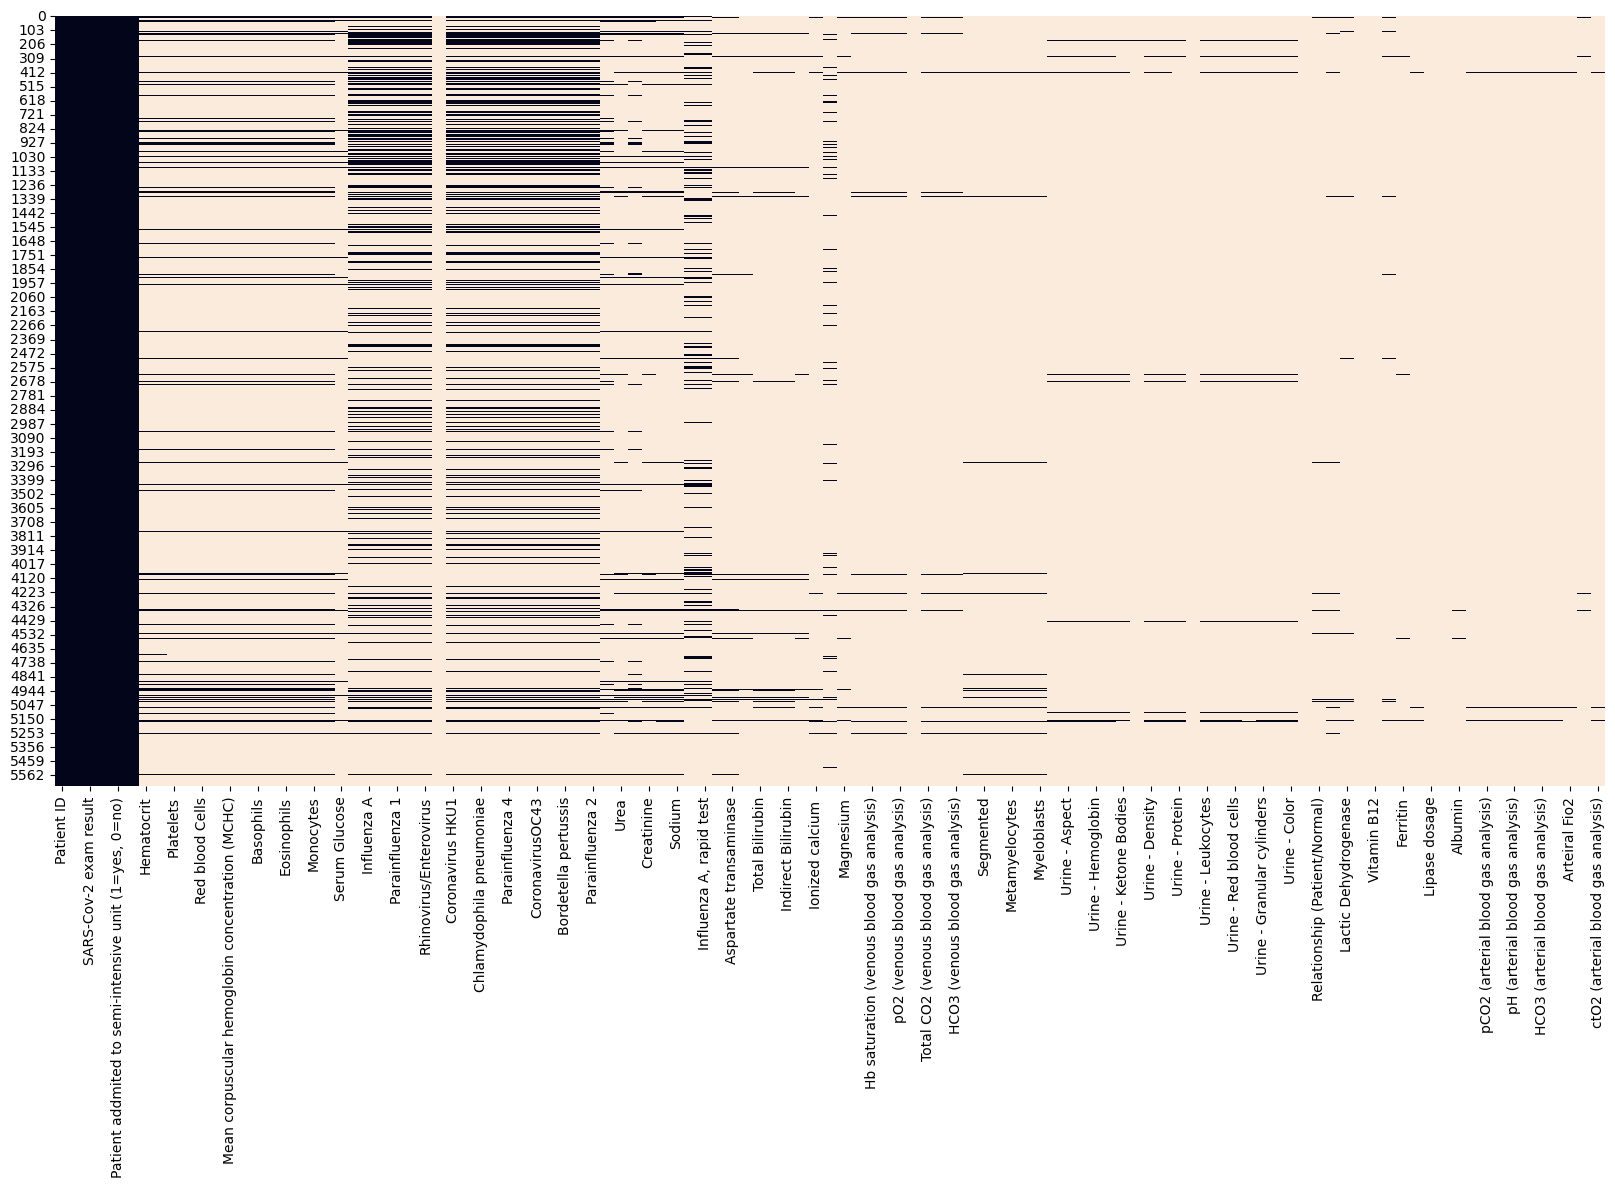

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [68]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Influenza A                                              0.760099
Respiratory Syncytial Virus                              0.760099
Parainfluenza 1                                          0.760454
Rhinovirus/Enterovirus                                   0.760454
Coronavirus HKU1                                         0.760454
Chlamydophila pneumoniae                                 0.760454
CoronavirusNL63                                          0.760454
Parainfluenza 3                                          0.760454
Adenovirus

##### B Elimination des colones inutiles

In [69]:
df=df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

<Axes: >

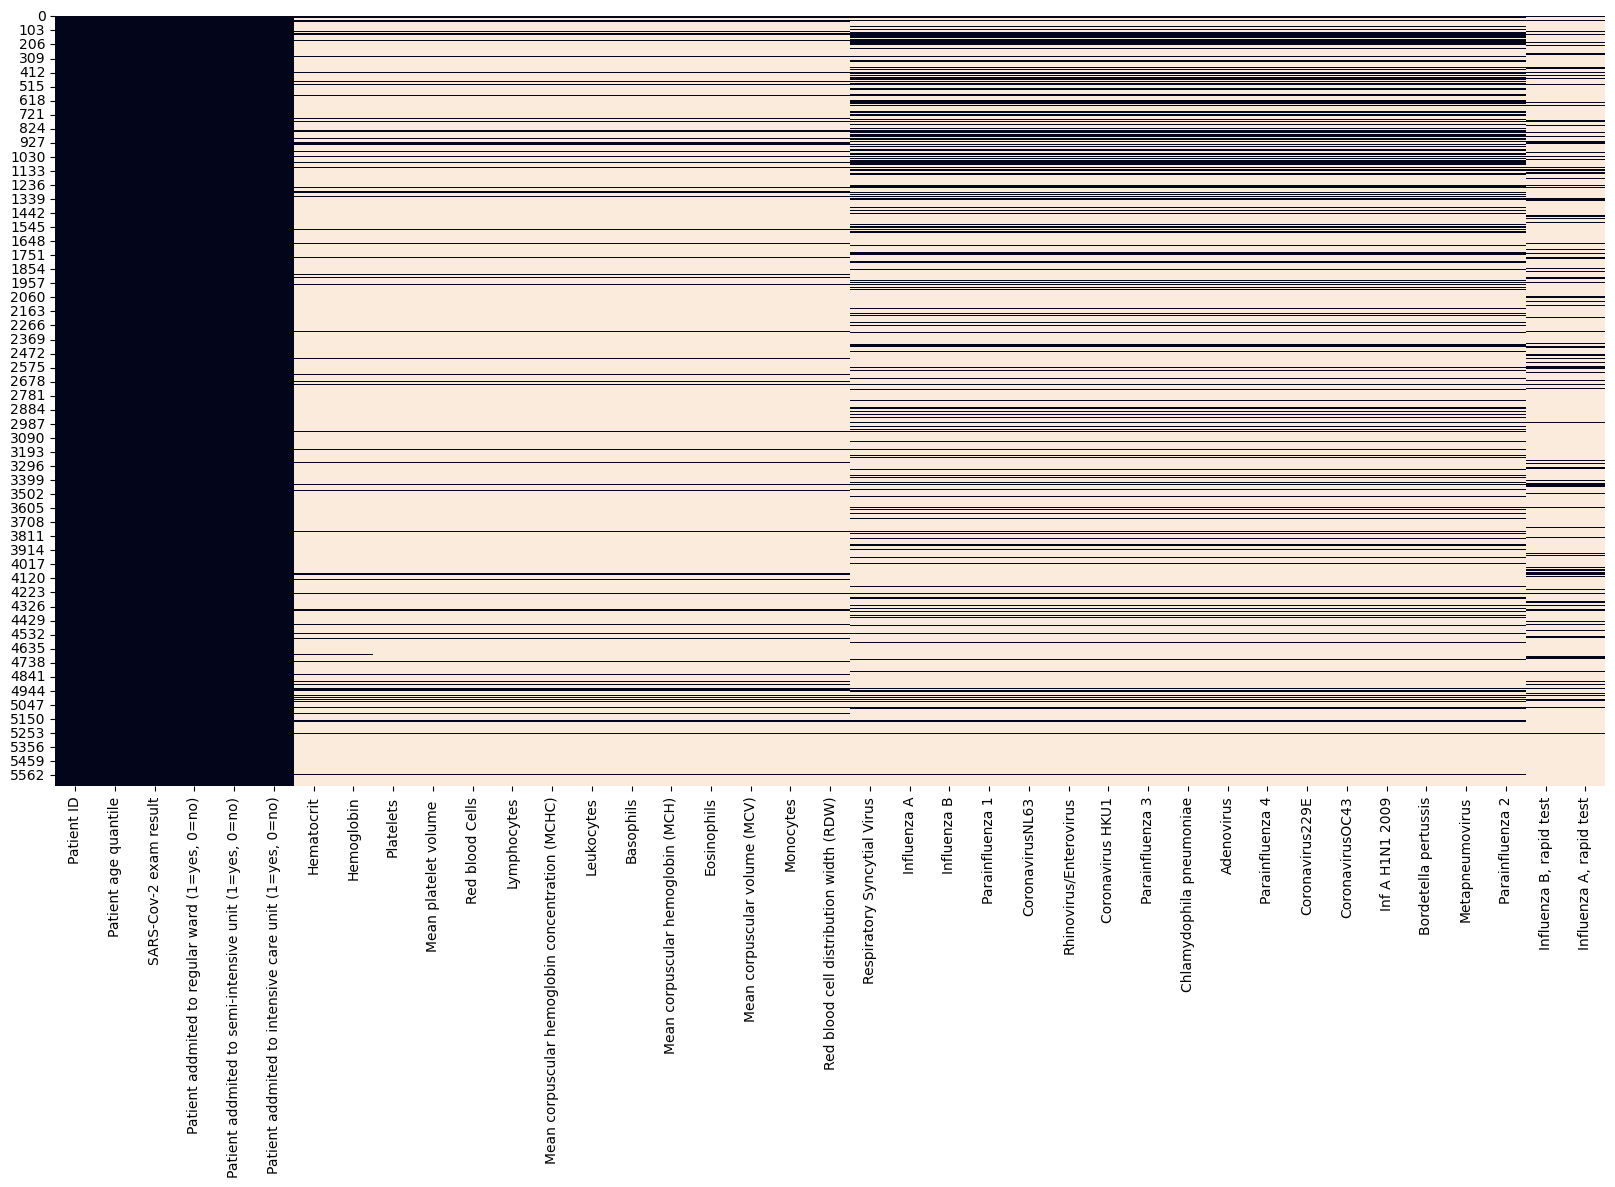

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [71]:
df=df.drop('Patient ID',axis=1)

In [72]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

#####  Analyse de la colonne Target 

In [73]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

#### Histogrammes des variables continues

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

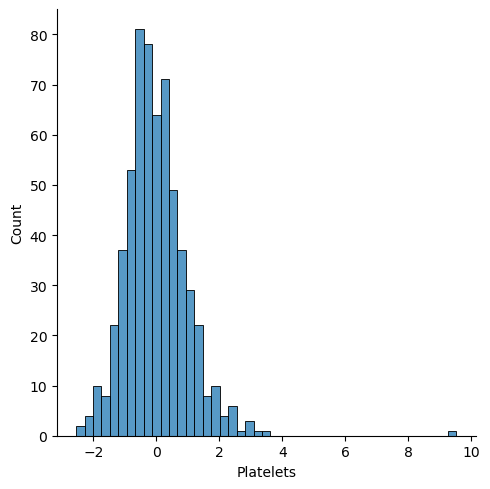

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

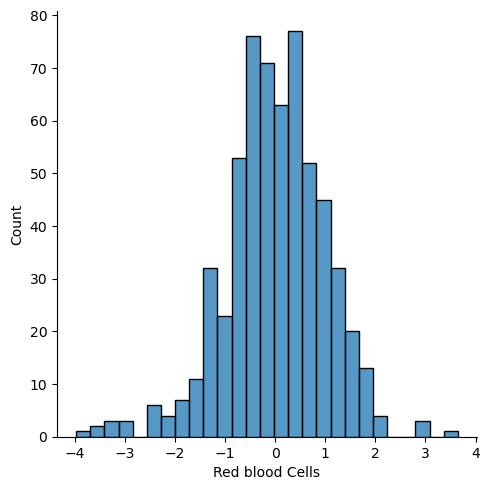

<Figure size 640x480 with 0 Axes>

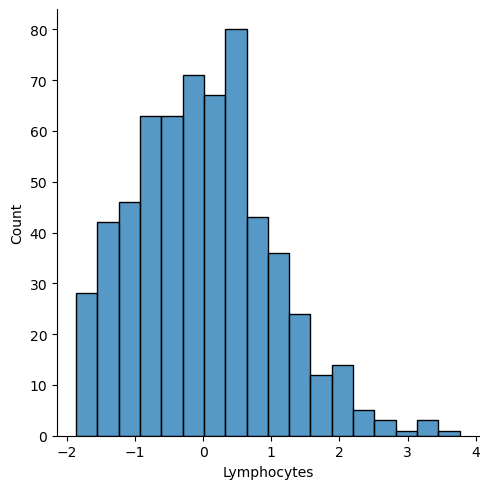

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

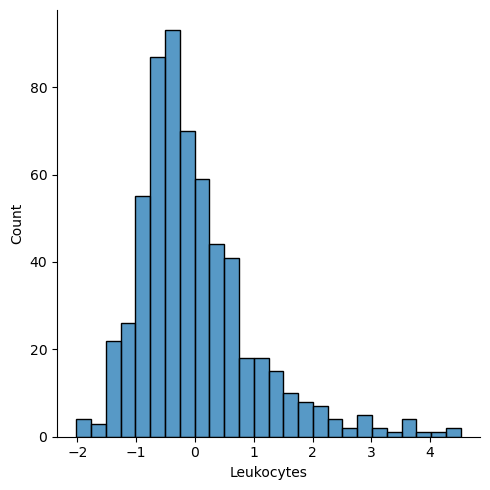

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

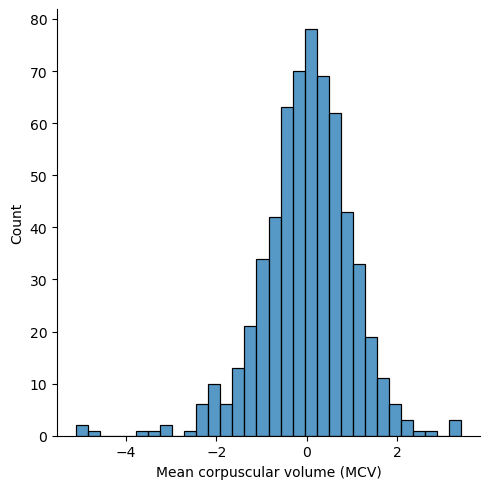

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

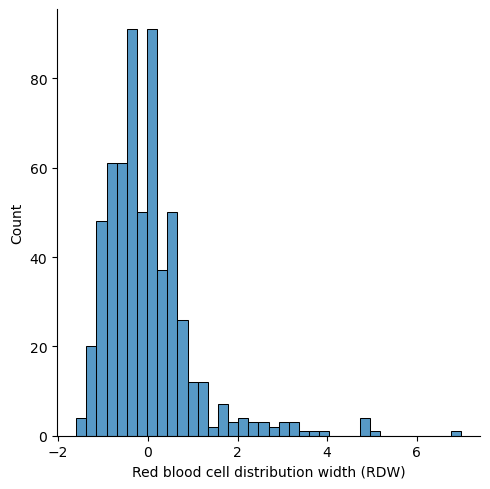

In [74]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])
    plt.show()

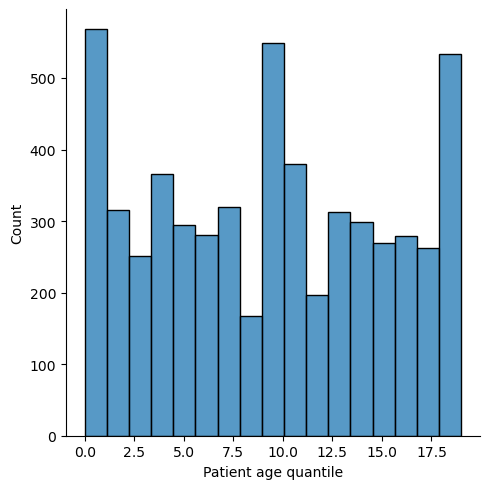

In [75]:
sns.displot(df['Patient age quantile'])

#### Variables qualitatives 

In [76]:
for col in df.select_dtypes('object'):
    print(f'{col:<50}{df[col].unique()}')

SARS-Cov-2 exam result                            ['negative' 'positive']
Respiratory Syncytial Virus                       [nan 'not_detected' 'detected']
Influenza A                                       [nan 'not_detected' 'detected']
Influenza B                                       [nan 'not_detected' 'detected']
Parainfluenza 1                                   [nan 'not_detected' 'detected']
CoronavirusNL63                                   [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus                            [nan 'detected' 'not_detected']
Coronavirus HKU1                                  [nan 'not_detected' 'detected']
Parainfluenza 3                                   [nan 'not_detected' 'detected']
Chlamydophila pneumoniae                          [nan 'not_detected' 'detected']
Adenovirus                                        [nan 'not_detected' 'detected']
Parainfluenza 4                                   [nan 'not_detected' 'detected']
Coronavirus229E         

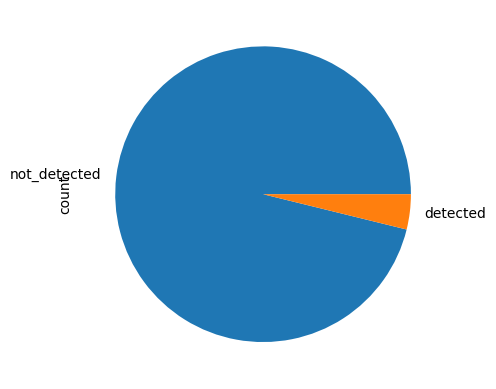

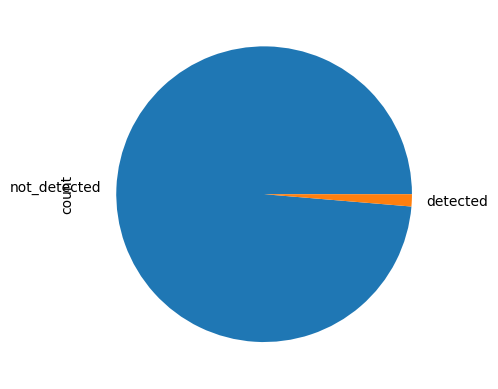

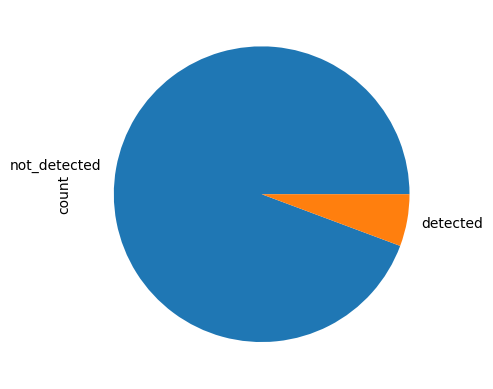

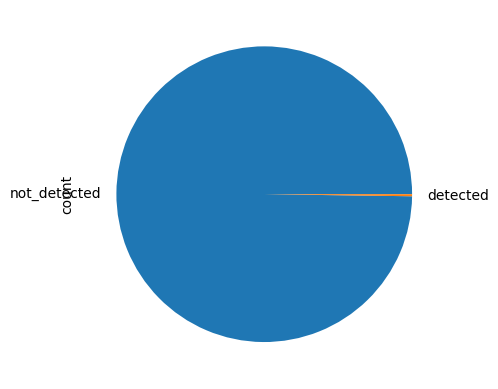

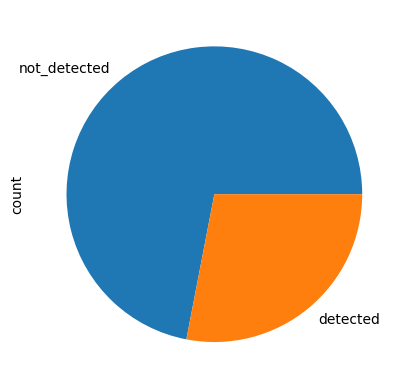

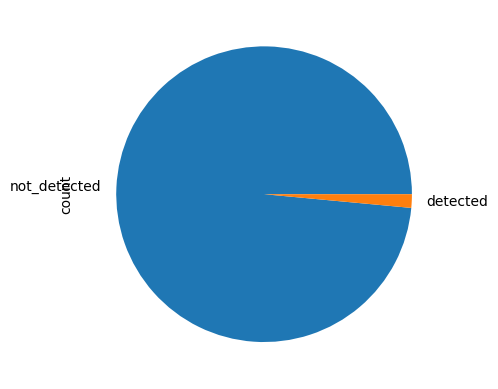

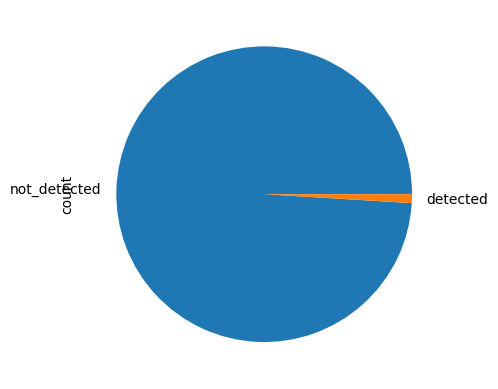

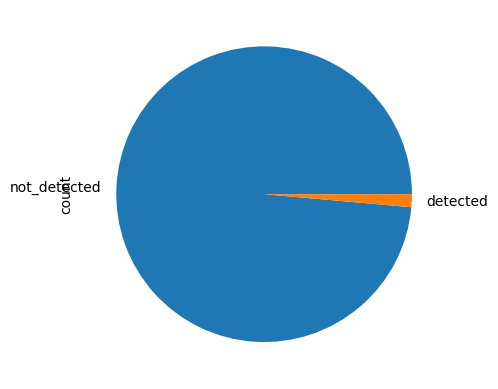

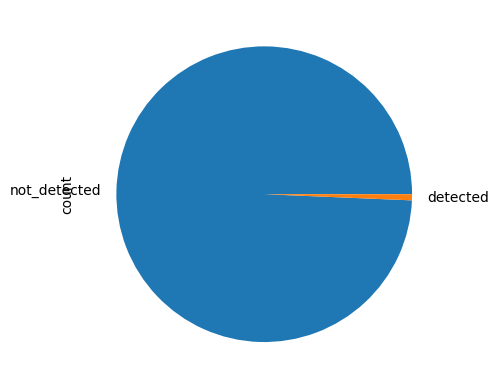

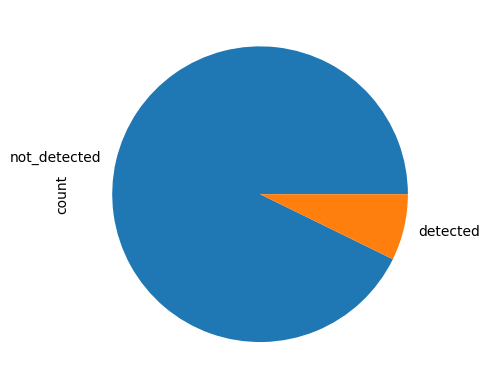

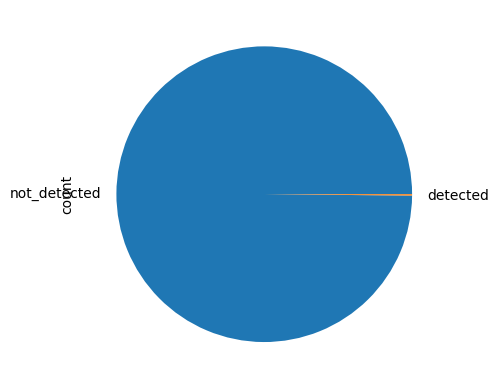

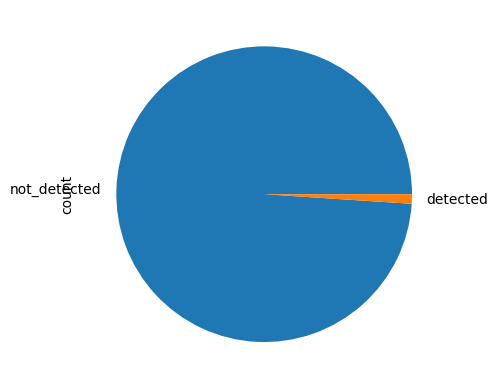

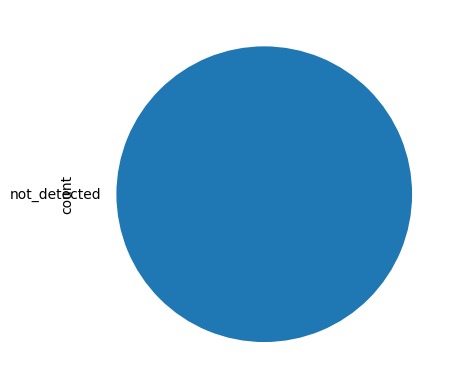

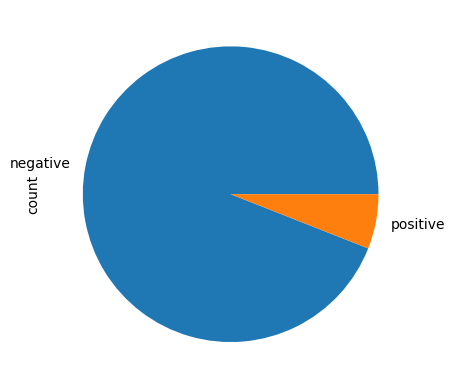

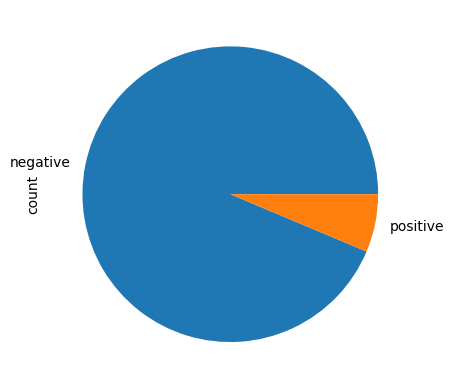

In [77]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

### Relation Target /Variables

#### Création de sous ensemble positifs et négatifs

In [78]:
positive_df=df[df['SARS-Cov-2 exam result'] =='positive']

In [79]:
negative_df=df[df['SARS-Cov-2 exam result'] =='negative']

#### Création des ensembles Blood et Viral 

In [80]:
missing_rate=df.isna().sum()/df.shape[0]

In [81]:
blood_columns=df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [82]:
viral_columns=df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

#### Target/ Blood

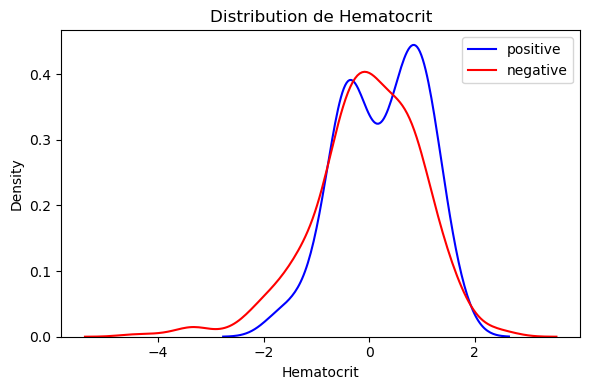

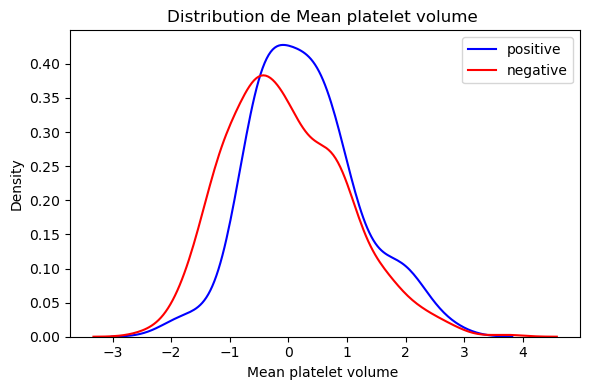

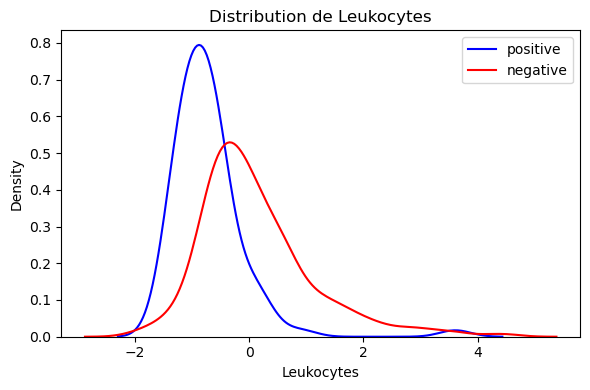

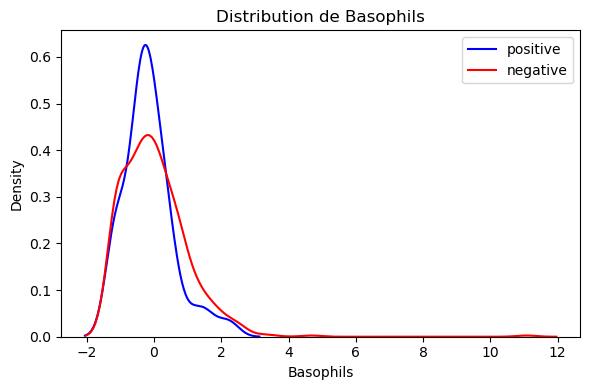

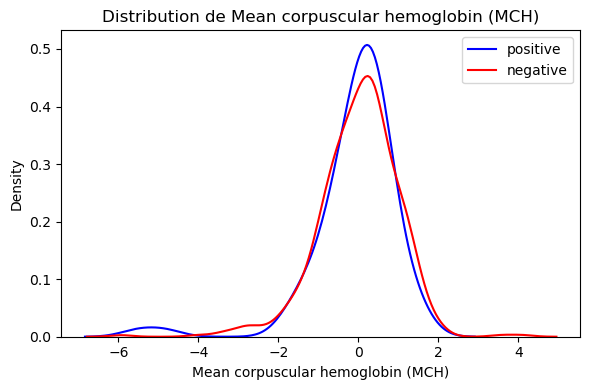

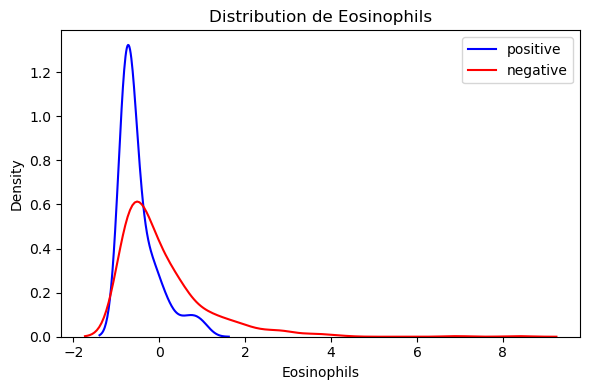

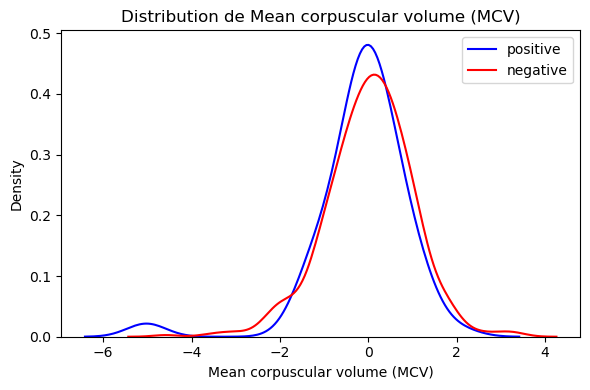

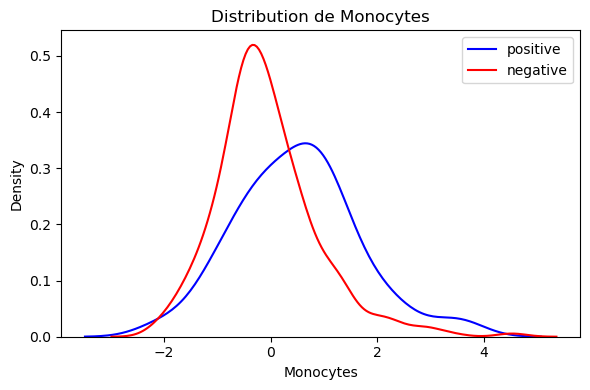

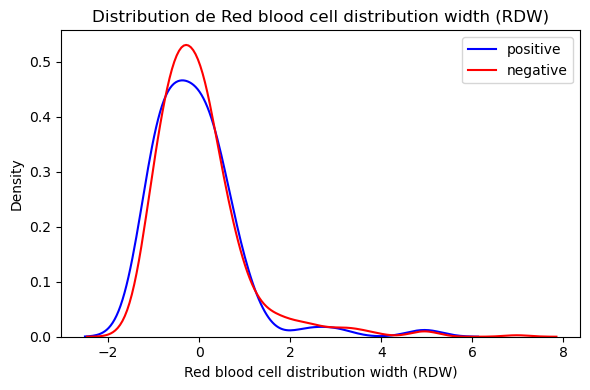

In [83]:
for col in blood_columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(positive_df[col], label="positive", color="blue")
    sns.kdeplot(negative_df[col], label="negative", color="red")
    plt.title(f"Distribution de {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

#### Relation Target / Age

<Axes: xlabel='Patient age quantile', ylabel='count'>

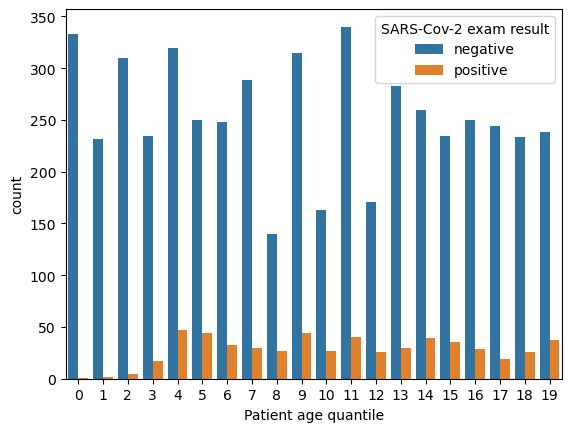

In [84]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

#### Relation Target / Viral

In [85]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

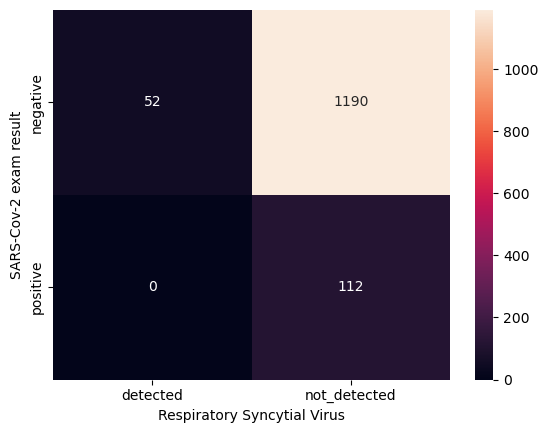

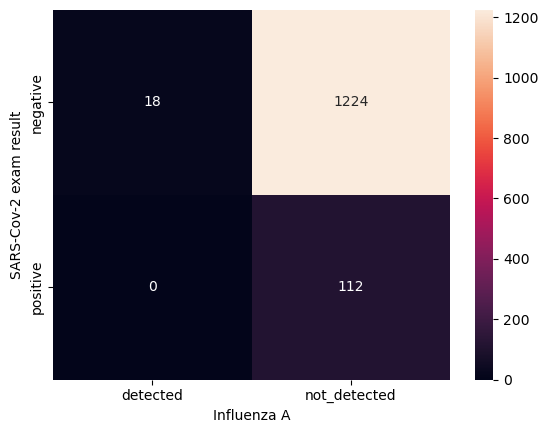

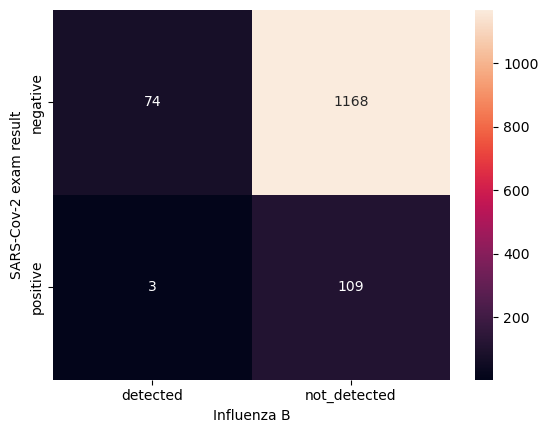

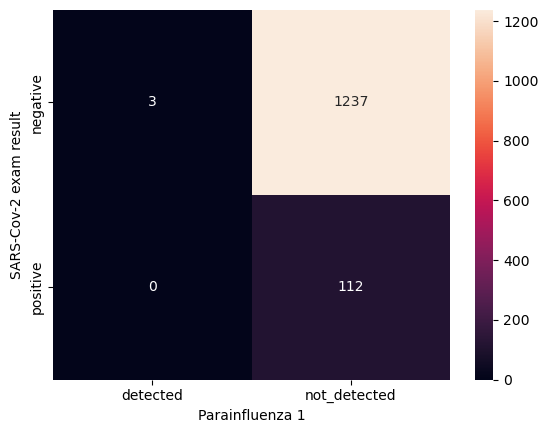

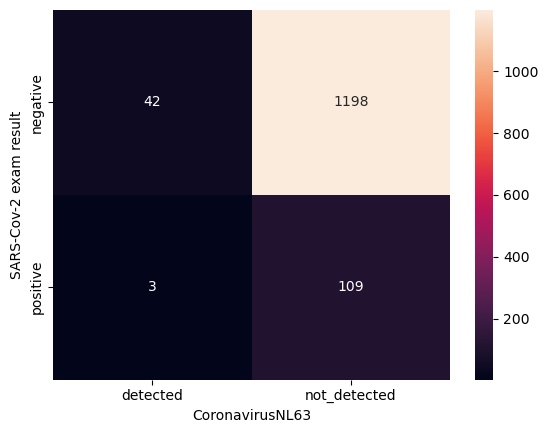

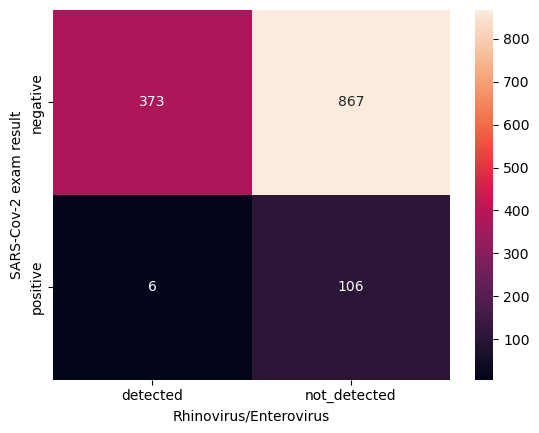

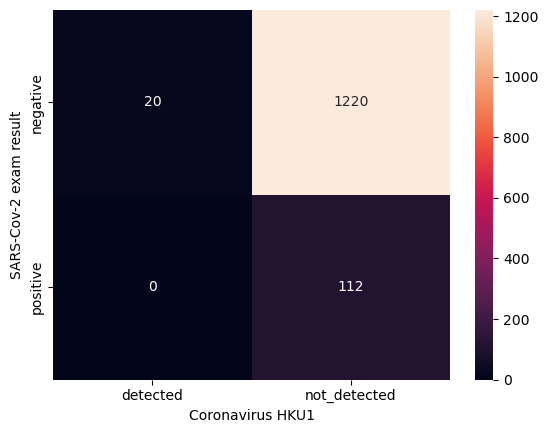

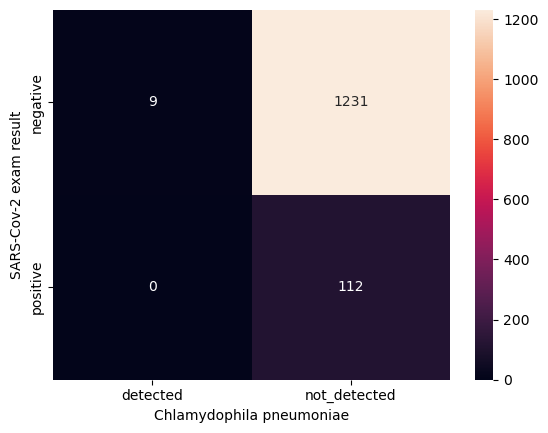

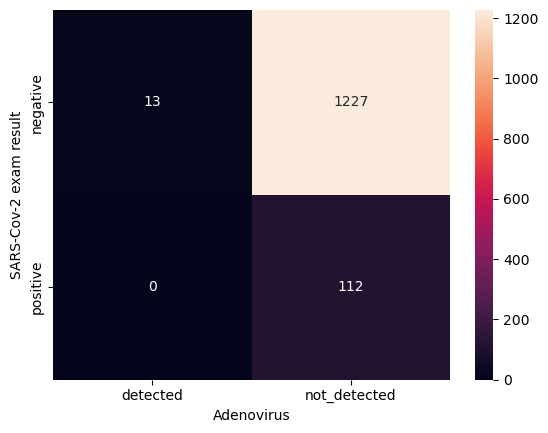

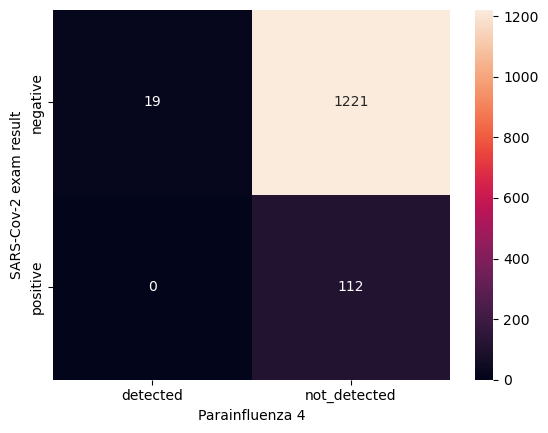

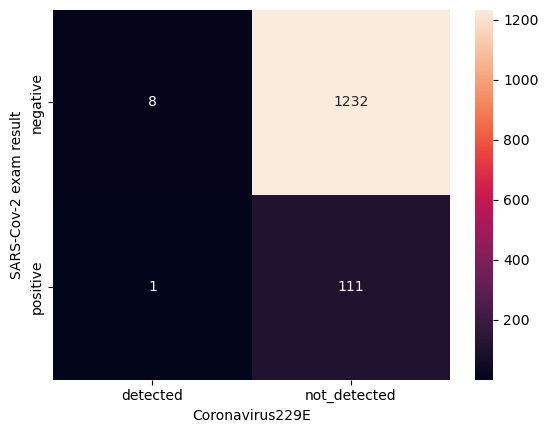

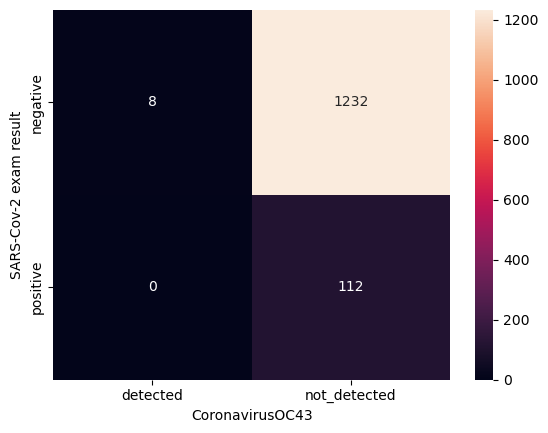

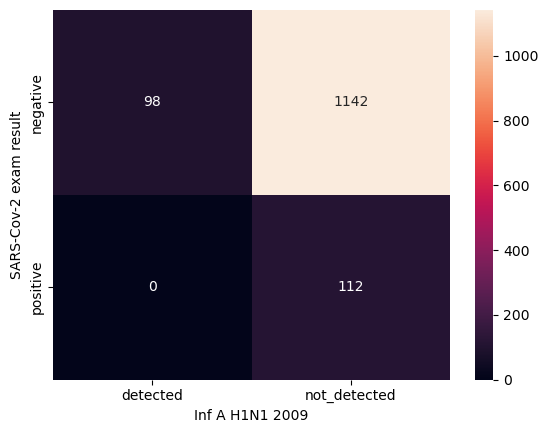

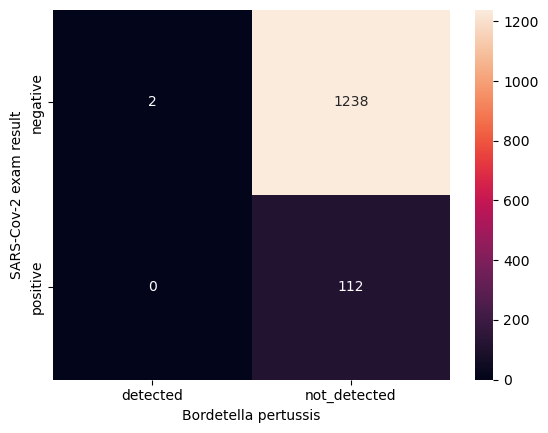

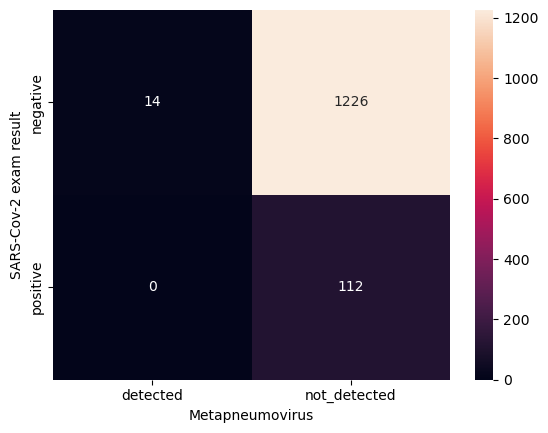

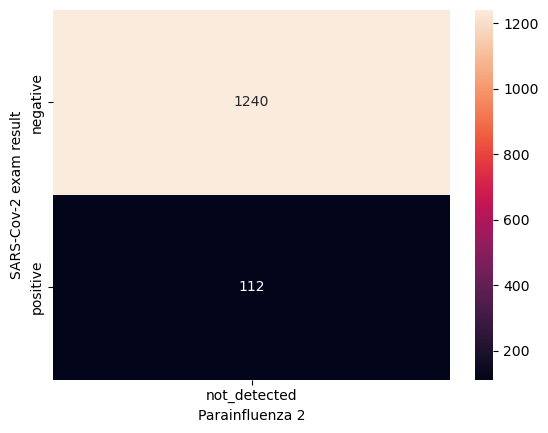

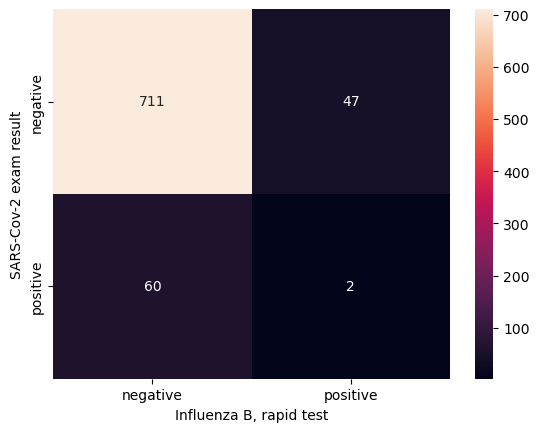

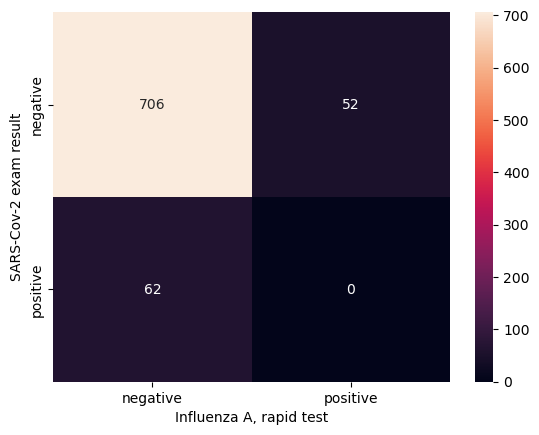

In [86]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')

#### conclusions initiales 

- Beaucoup de données manquantes (au mieux on garde 20% du dataset)
- 2 groupes de données intéressantes (viral, sanguin)
- Presque pas de variables discriminante pour distinguer les cas positifs et negatifs ce qui nous permet de dire qu'il n'est pas vraiement apropriés de vouloir prédie si un individu est atteint du covid 19 en se basant sur ces simples tests sanguins.
- On a des variables interessantes 

#### Analyse détaillée 

#### Relation Variables / Variables 

- blood_data /blood_data: Certaines variables sont très corrélés + 0.9 
- blood_data / age
- viral / viral
- relation maladie / blood_data
- relation hospitalisation / est malade
- relation hospitalisation / blood

- Nan Analyse

#### Hypotheses nulle (H0)

In [88]:
- Les individus atteints du covid 19 ont des taux de leucocytes, Monocytes,Platelets significativement différents 
- Les individus atteints d une quelconque maladie

SyntaxError: invalid syntax (1257049455.py, line 1)

#### Relation taux sanguin

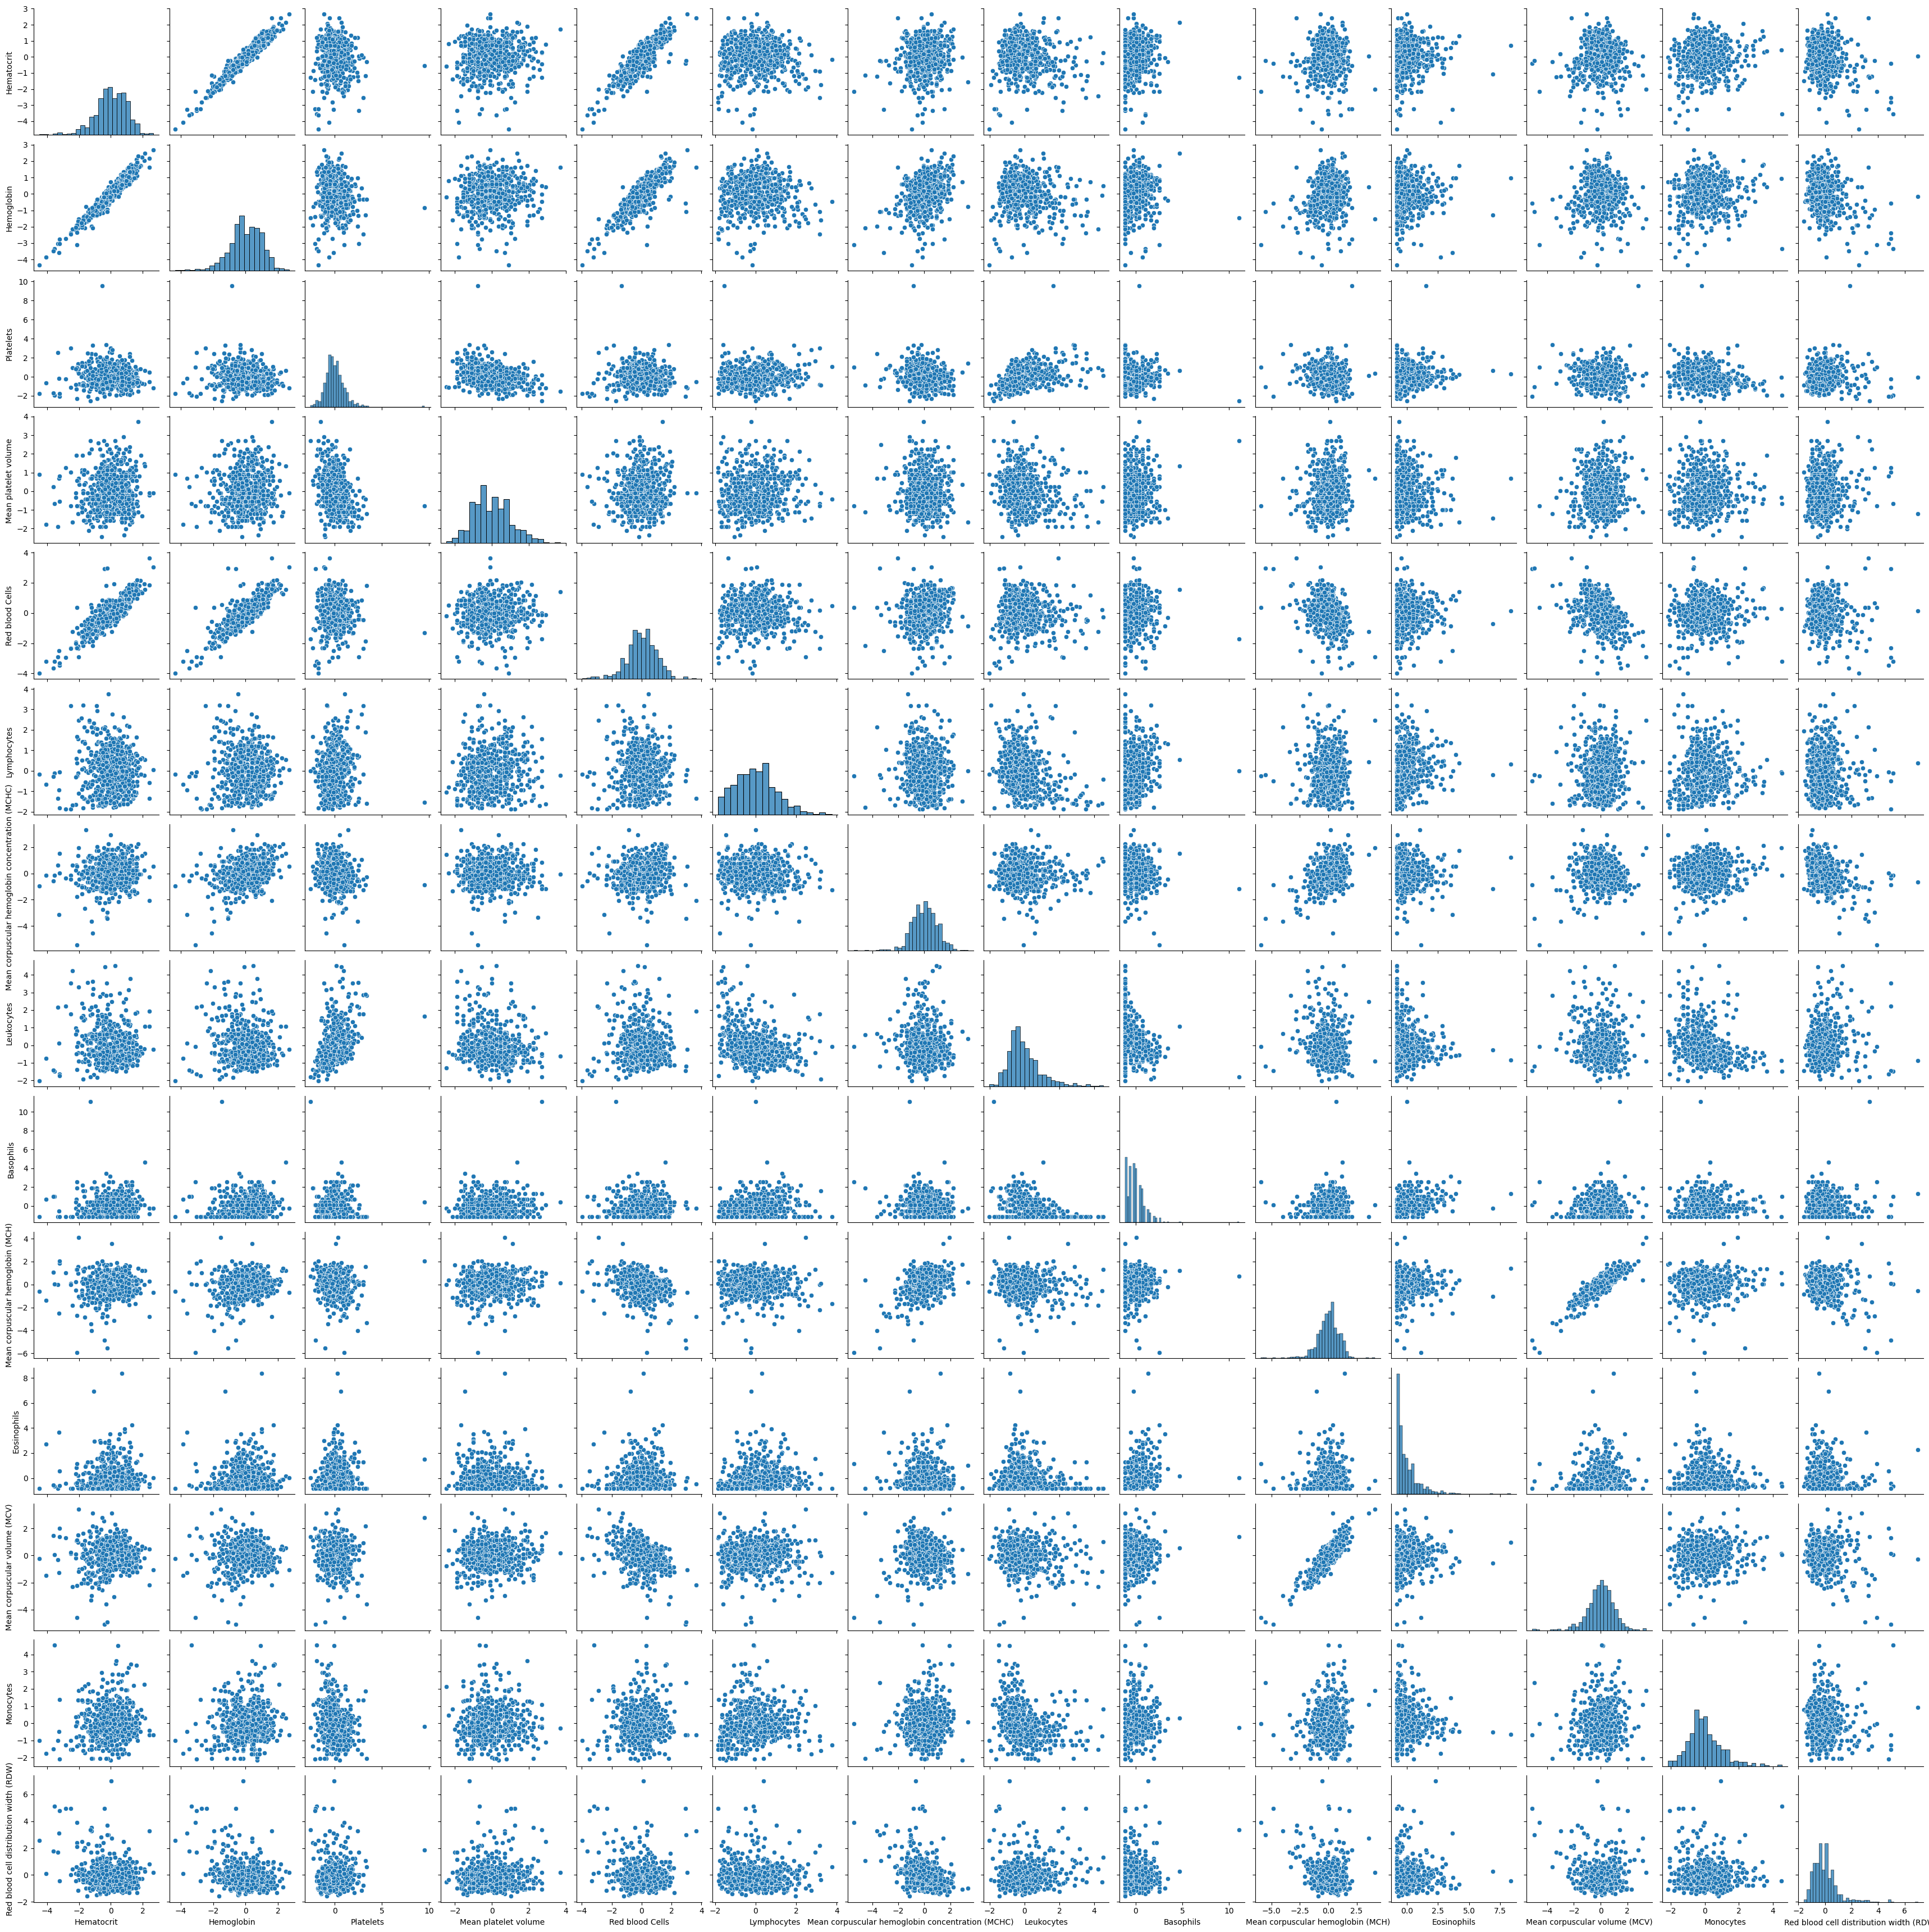

In [89]:
sns.pairplot(df[blood_columns])

In [ ]:
sns.clustermap(df[blood_columns].corr())

#### Relation Age /Sang 

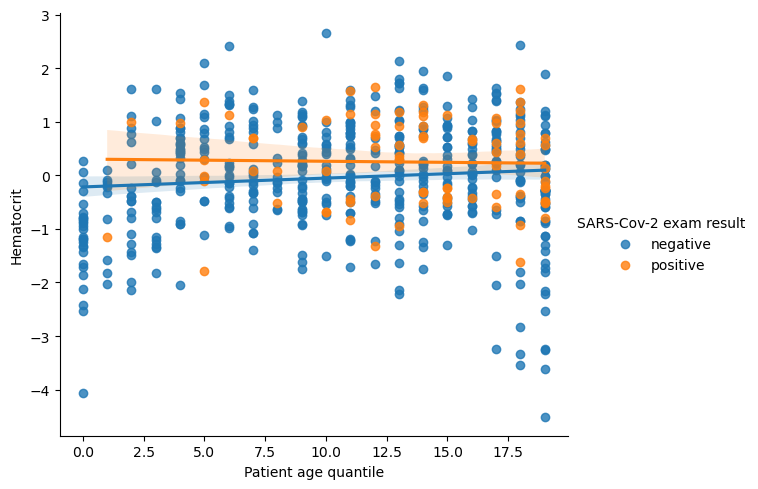

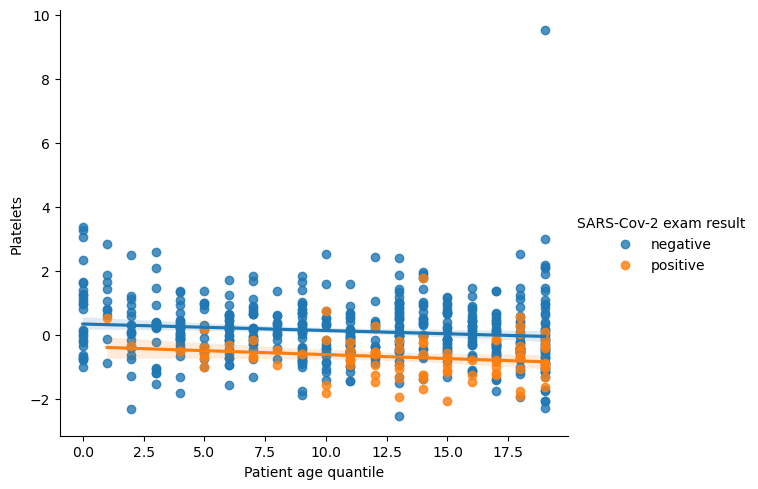

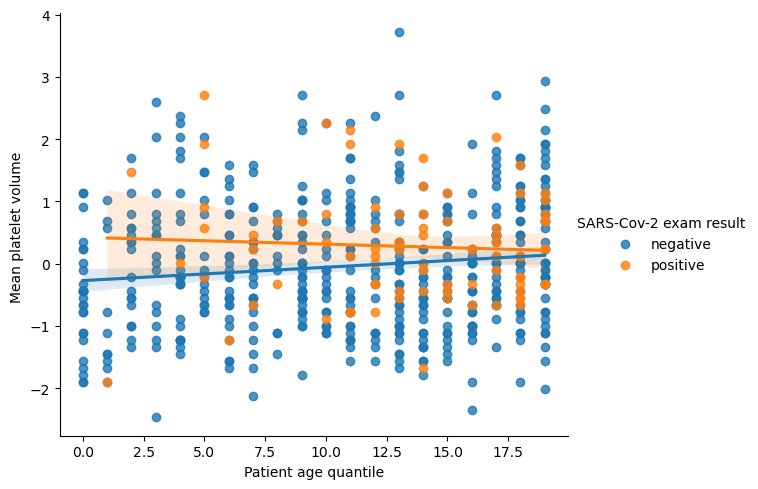

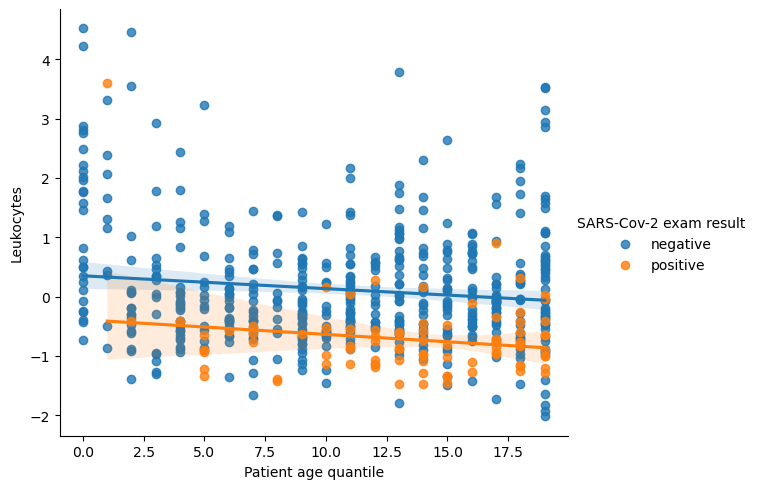

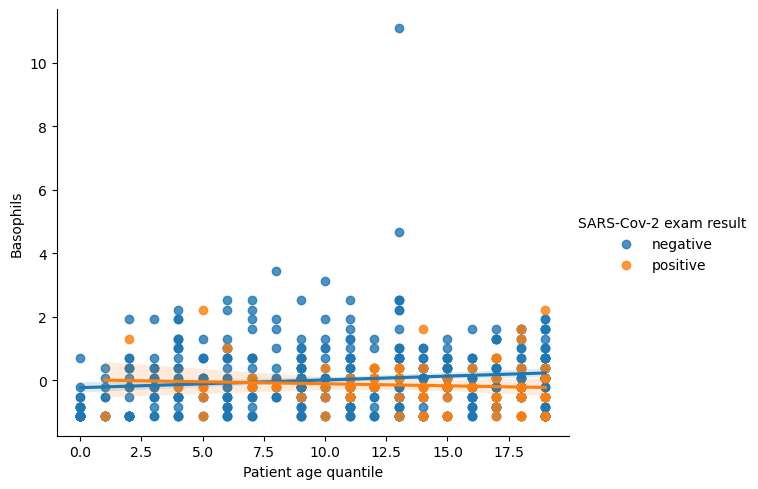

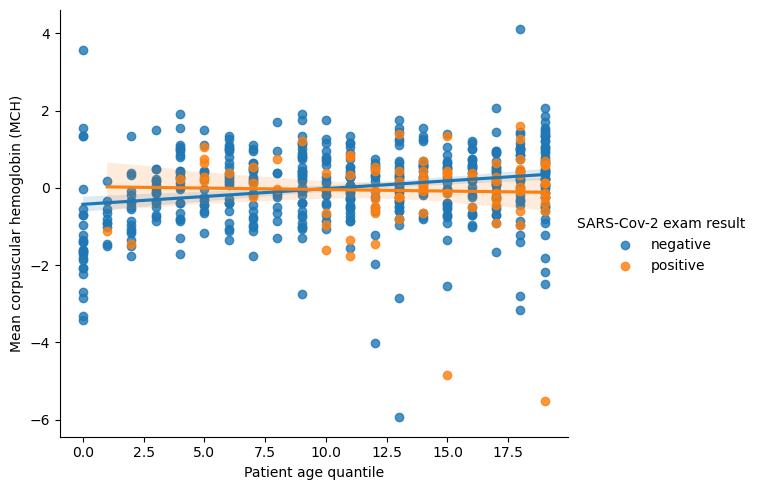

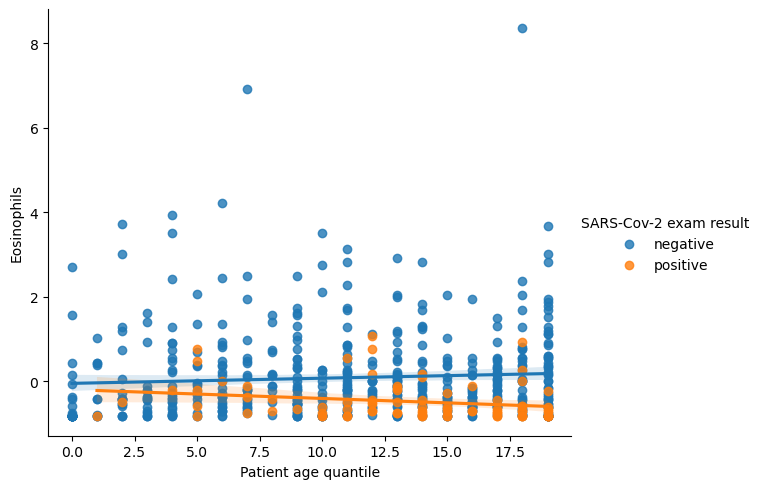

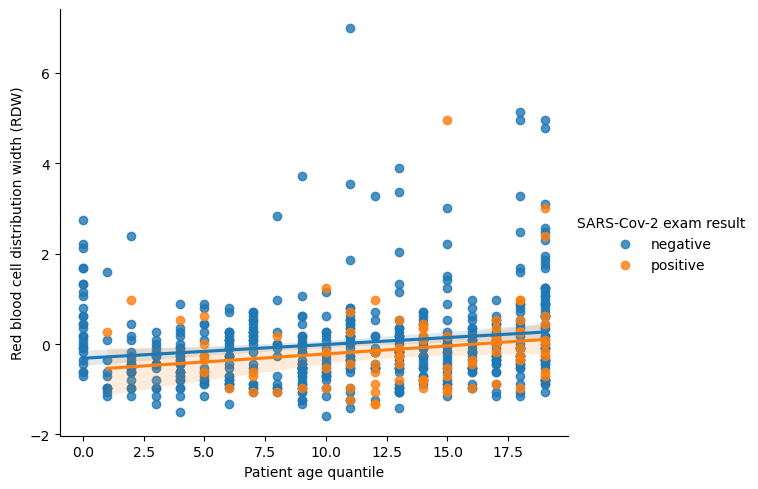

In [93]:
for col in blood_columns:
    sns.lmplot(x='Patient age quantile',y=col, hue='SARS-Cov-2 exam result',data=df,height=5,aspect=1.2)

In [96]:
df.corr()['Patient age quantile'].sort_values()

ValueError: could not convert string to float: 'negative'

In [97]:
df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5639                     3               positive   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          